In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from utils import sigmoid, normalization, get_batch

In [4]:
def test(w, b, x, y):
    y_ = np.dot(w,x) + b
    a = sigmoid(y_)
    predict = np.where(a < 0.5, 0, 1)
    return 1 - np.mean(np.abs(predict - y), axis=1)
    

In [6]:
def generate_train_test(X, Y, path_to_save='data/'):
    '''
    根据原始数据集，按照0.9、0.1的比例划分为训练集和测试集。并将划分的数据保存到本地。
    @param:
        X:原始特征数据
        Y:原始标记数据
        path_to_save:数据保存路径
    '''
    train = [[],[]]
    test = [[],[]]
    
    for i in range(Y.shape[1]): 
        seed = np.random.randint(0,100)
        j = i + 1
        if seed < 90:
            train[0].append(X[:, i:j])
            train[1].append(Y[:, i:j])
        else:
            test[0].append(X[:, i:j])
            test[1].append(Y[:, i:j])
    
    train_x = np.hstack(train[0])
    train_y = np.hstack(train[1])

    test_x = np.hstack(test[0])
    test_y = np.hstack(test[1])

#     print(train_x.shape)
    np.save(path_to_save + 'train_x', train_x)
    np.save(path_to_save + 'train_y', train_y)
    np.save(path_to_save + 'test_x', test_x)
    np.save(path_to_save + 'test_y', test_y)
    print('data has been generated and saved under the path:', path_to_save)

In [93]:
y_path = 'data/Y_train'
dfy = pd.read_csv(y_path, dtype=np.float32)

Y = dfy['label'].values
Y = np.reshape(Y, (1, Y.shape[0]))
dfy = None
print(Y.shape)

(1, 54256)


In [94]:
x_path = 'data/X_train'
dfx = pd.read_csv(x_path, dtype=np.float32)
X = dfx.iloc[:, 1:].values
X = X.T
dfx = None
X = normalization(X)
print(X.shape)

(510, 54256)


In [ ]:
# 切分监督数据为训练集和测试集，并保存到本地
generate_train_test(X, Y)

In [6]:
# 加载保存到本地的训练集和测试集数据

X = np.load('data/train_x.npy')
Y = np.load('data/train_y.npy')

Xt = np.load('data/test_x.npy')
Yt = np.load('data/test_y.npy')
print('the shape of X is', X.shape)
print('the shape of Y is', Y.shape)

the shape of X is (510, 48896)
the shape of Y is (1, 48896)


Training on 1000 batch,learning rate is 0.125, loss is 0.4404. Accury is 0.809701
Training on 2000 batch,learning rate is 0.0625, loss is 0.387289. Accury is 0.809701
Training on 3000 batch,learning rate is 0.0416667, loss is 0.455828. Accury is 0.810075
Training on 4000 batch,learning rate is 0.03125, loss is 0.391744. Accury is 0.810448
Training on 5000 batch,learning rate is 0.025, loss is 0.387394. Accury is 0.810634
Training on 6000 batch,learning rate is 0.0208333, loss is 0.392077. Accury is 0.809888
Training on 7000 batch,learning rate is 0.0178571, loss is 0.453562. Accury is 0.809888
Training on 8000 batch,learning rate is 0.015625, loss is 0.409053. Accury is 0.810075
Training on 9000 batch,learning rate is 0.0138889, loss is 0.437495. Accury is 0.809888
Training on 10000 batch,learning rate is 0.0125, loss is 0.474122. Accury is 0.809888
Training on 11000 batch,learning rate is 0.0113636, loss is 0.423464. Accury is 0.810075
Training on 12000 batch,learning rate is 0.010416

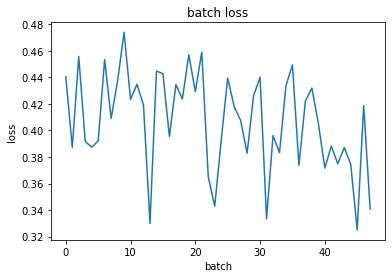

In [7]:
NODE = 1
INPUT_NODE = 510
epsilon = 1e-9
TRAIN_STEP = 100
alpha = 0.25
A0 = alpha
BATCH_SIZE = 100
LEARNING_RATE_DECAY = 1
BETA = 0.9

M = X.shape[1]

# 初始化参数
w = np.random.rand(NODE, INPUT_NODE)
b = np.zeros((NODE,1))

#初始化初始动量
sdw = np.zeros((NODE,INPUT_NODE))
sdb = np.zeros((NODE,1))

losses = []

k = 1
for epoch in range(TRAIN_STEP):
    index = 0
    while True:
        x, y, index = get_batch(index, BATCH_SIZE, X, Y)
        if x is None:
            break
            
        y_ = np.dot(w,x) + b
        a = sigmoid(y_)
        m = y.shape[1]
        cross_entropy = (1 - y) * np.log(1 - a + epsilon) + y * np.log(a + epsilon)
        loss = -1 / m * np.sum(cross_entropy)
        
        dz = a - y
        dw = 1.0 / m * np.dot(dz, x.T)
        db = 1.0 / m * np.sum(dz)
        
        # Momentum
        sdw = BETA * sdw + (1-BETA) * dw
        sdb = BETA * sdb + (1-BETA) * db
        
        w = w - alpha * sdw
        b = b - alpha * db
         
        if k % 1000 == 0:
            losses.append(loss)
            accury = test(w,b,Xt,Yt)
            print('Training on %d batch,learning rate is %g, loss is %g. Accury is %g'\
                  %(k, alpha, loss, accury))
        k += 1
    alpha = A0 / (1 + LEARNING_RATE_DECAY * epoch) 
    
plt.figure()
plt.plot(losses)
plt.title('batch loss')
plt.xlabel('batch')
plt.ylabel('loss')
plt.show()

In [45]:
# 加载最终预测集数据
path_test ='data/X_test'
dft = pd.read_csv(path_test, dtype=np.float32)
Xt = dft.iloc[:, 1:].values
Xt = Xt.T
dft = None
Xt = normalization(Xt)

In [55]:
# 使用训练模型预测数据
y_ = np.dot(w, Xt) + b
a = sigmoid(y_)
predict = np.where(a < 0.5, 0, 1)
print('prediction shape is ', predict.shape)

(1, 27622)

In [56]:
# 保存结果到本地
index = [x for x in range(0, predict.shape[1])]
result = pd.DataFrame(predict.T, index=index, columns=['label'])
result.to_csv('data/result_lr.csv')